<a href="https://colab.research.google.com/github/nshamid/iris-classifications/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Memuat dataset IRIS
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

In [ ]:
print("Statistik Deskriptif Dataset IRIS:")
print(df.describe())

Statistik Deskriptif Dataset IRIS:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


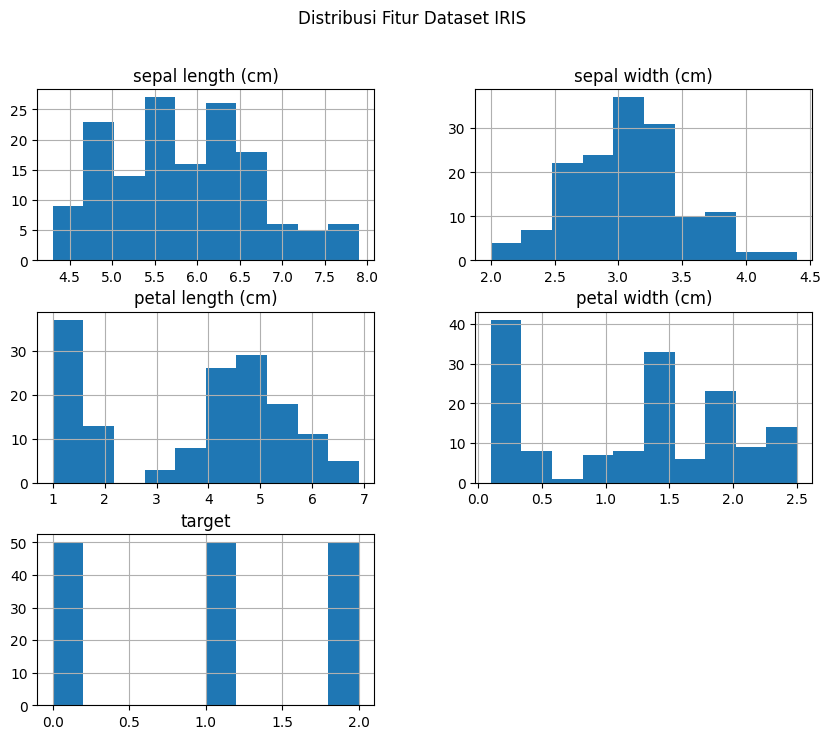

In [ ]:
#Visualisasi Histogram untuk setiap fitur
df.hist(figsize=(10, 8))
plt.suptitle("Distribusi Fitur Dataset IRIS")
plt.show()

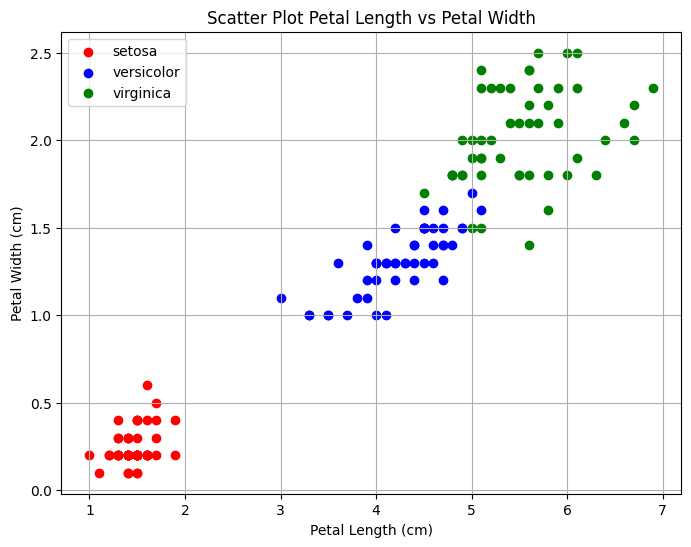

In [ ]:
#Visualisasi Scatter Plot (Petal Length vs Petal Width)
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for target, color in enumerate(colors):
    plt.scatter(
        df[df['target'] == target]['petal length (cm)'],
        df[df['target'] == target]['petal width (cm)'],
        label=iris.target_names[target],
        color=color
    )

plt.title("Scatter Plot Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()

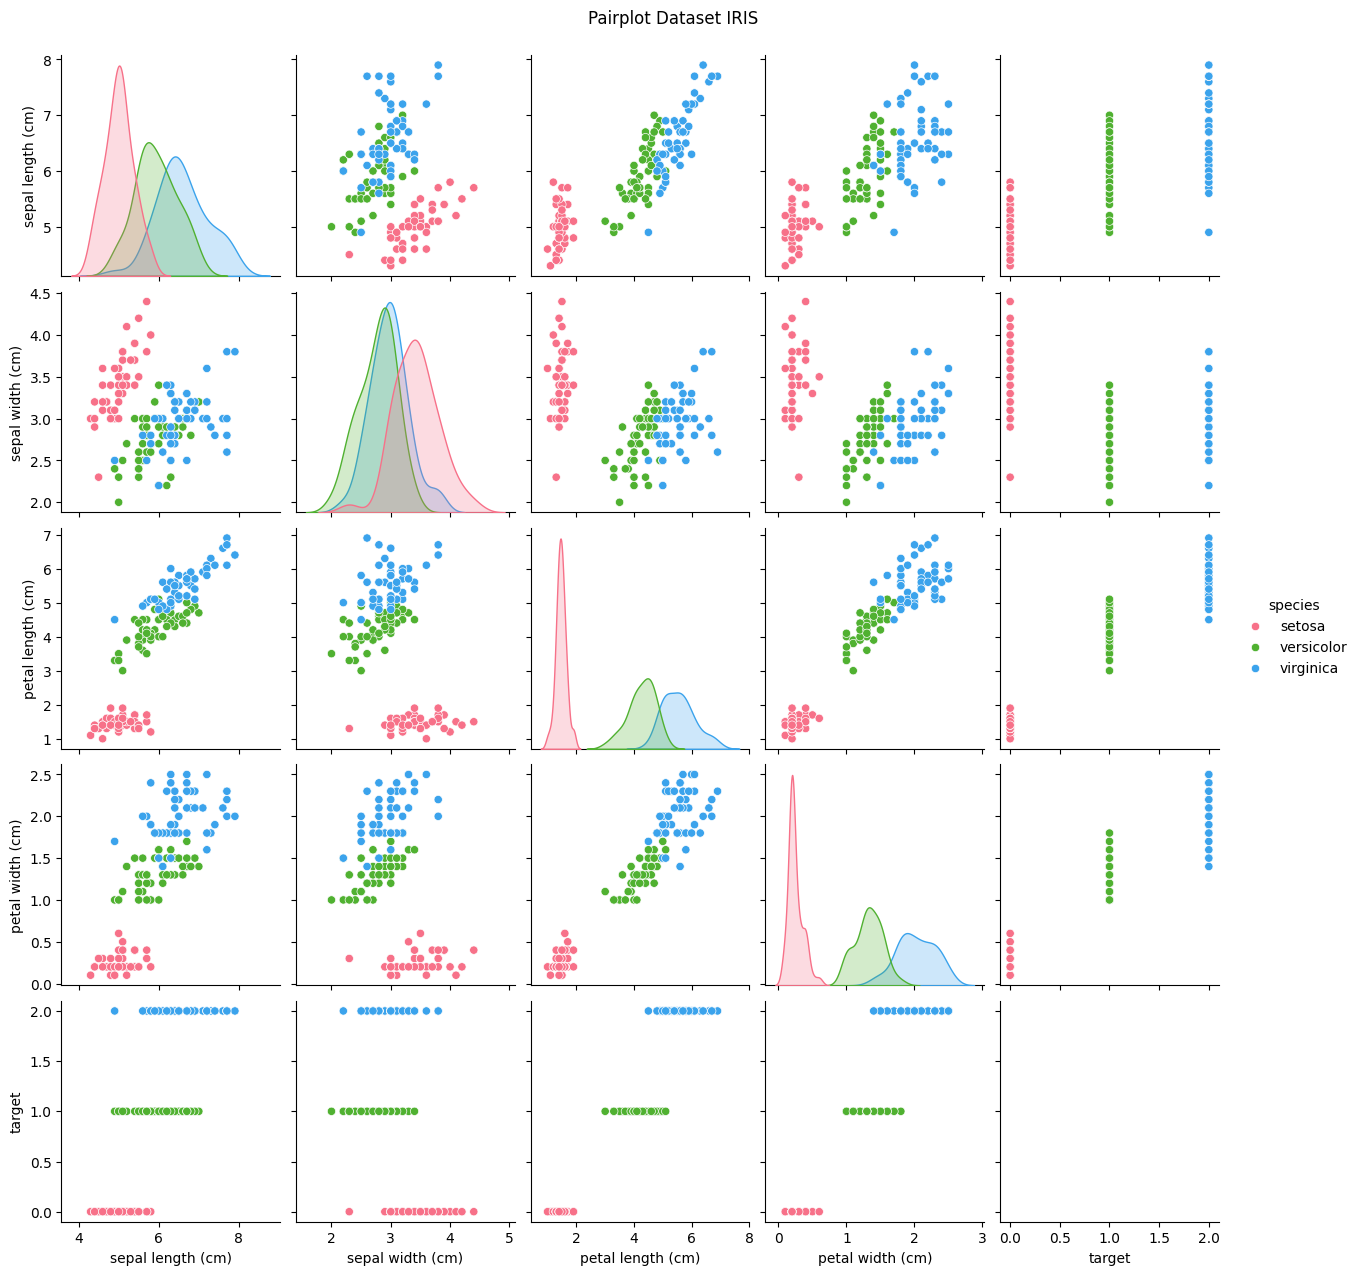

In [ ]:
#Visualisasi Pairplot untuk semua fitur
sns.pairplot(df, hue='species', diag_kind='kde', palette='husl')
plt.suptitle("Pairplot Dataset IRIS", y=1.02)
plt.show()

In [ ]:
# Pembagian Dataset
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Implementasi Model KNN
k = 3  # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediksi Data Testing
y_pred = knn.predict(X_test)

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model dengan K={k}: {accuracy * 100:.2f}%\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Akurasi Model dengan K=3: 95.56%

Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



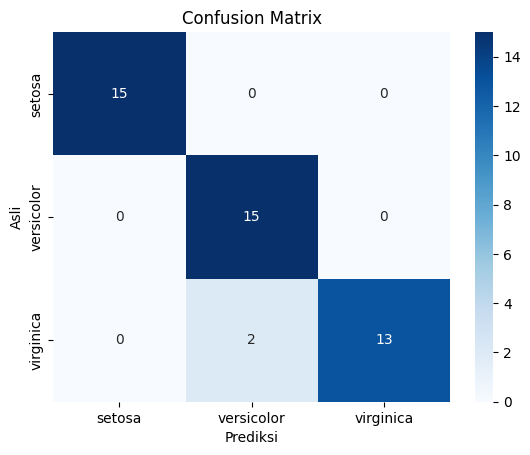

In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Asli")
plt.title("Confusion Matrix")
plt.show()